Querying keyword data...
 -> hmi.ic_720s[2010.05.01_TAI-2016.04.01_TAI@6h]
 -> 8649 lines retrieved.


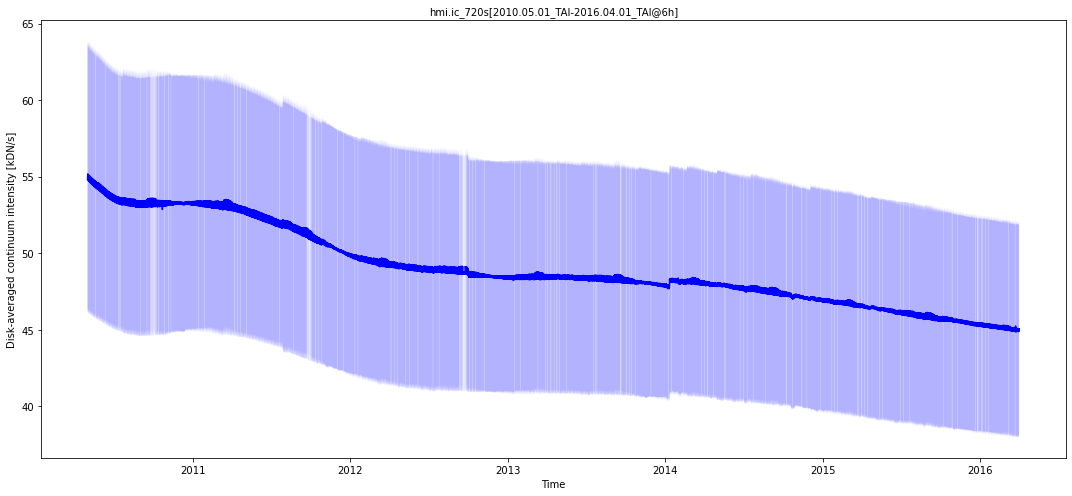

In [1]:
from __future__ import absolute_import, division, print_function
import matplotlib.pyplot as plt
#import example_helpers
import drms


# Series name and timespan
series = 'hmi.ic_720s'
#tsel = '2014.01.01_TAI/365d@1h'
tsel = '2010.05.01_TAI-2016.04.01_TAI@6h'

# DRMS query string
qstr = '%s[%s]' % (series, tsel)


# Create DRMS JSON client, use debug=True to see the query URLs
c = drms.Client()

# Send request to the DRMS server
print('Querying keyword data...\n -> %s' % qstr)
res = c.query(qstr, key=['T_REC', 'DATAMEAN', 'DATARMS'])
print(' -> %d lines retrieved.' % len(res))

# Convert T_REC strings to datetime and use it as index for the series
res.index = drms.to_datetime(res.pop('T_REC'))

# Note: DATARMS contains the standard deviation, not the RMS!
t = res.index
avg = res.DATAMEAN/1e3
std = res.DATARMS/1e3

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_title(qstr, fontsize='medium')
ax.fill_between(
    t, avg+std, avg-std, edgecolor='none', facecolor='b', alpha=0.3,
    interpolate=True)
ax.plot(t, avg, color='b')
ax.set_xlabel('Time')
ax.set_ylabel('Disk-averaged continuum intensity [kDN/s]')
fig.tight_layout()

plt.show()